
# Diabetes Prediction with Logistic Regression (Jupyter Notebook)

This notebook builds a **logistic regression** classifier on the classic Pima Indians Diabetes dataset (diabetes.csv), evaluates it with standard metrics, and visualizes results (confusion matrix and ROC curve).  
It is clean, portfolio-ready, and uses **matplotlib only** for plots.


## 1) Requirements
Run this once if needed:
pandas
matplotlib
scikit-learn

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, auc
)
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

## 2) Load the data

In [2]:
DATA_PATH = "diabetes.csv" #dataset in same directory
df = pd.read_csv(DATA_PATH)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3) Quick data check

In [11]:
print(f"(Rows, Columns): {df.shape}\n")
print(df.dtypes)
df.describe()

(Rows, Columns): (768, 9)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4) Optional: simple histograms

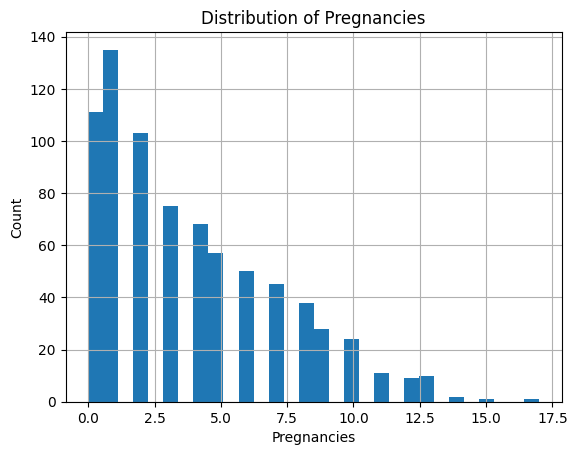

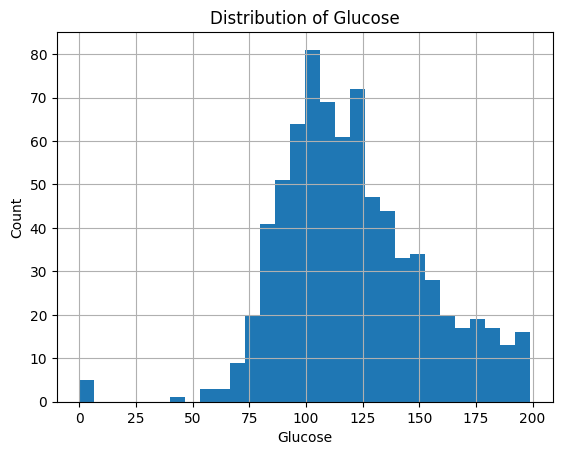

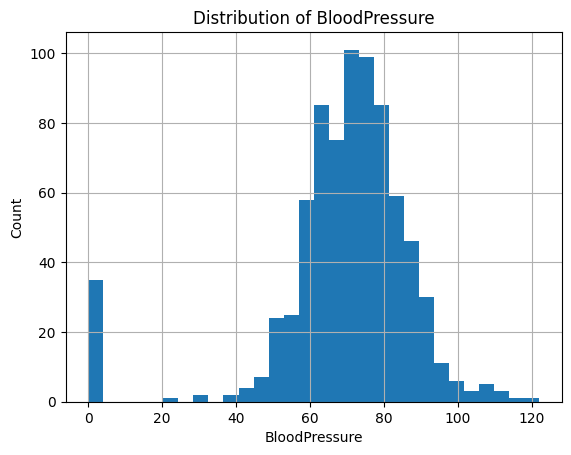

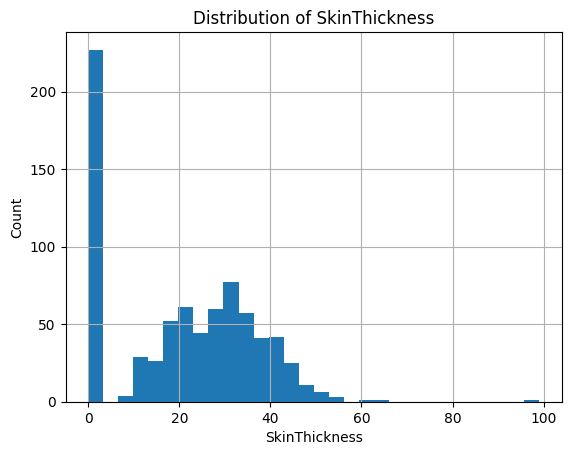

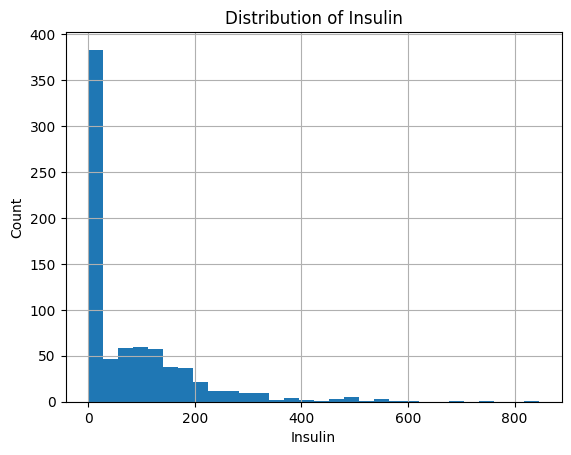

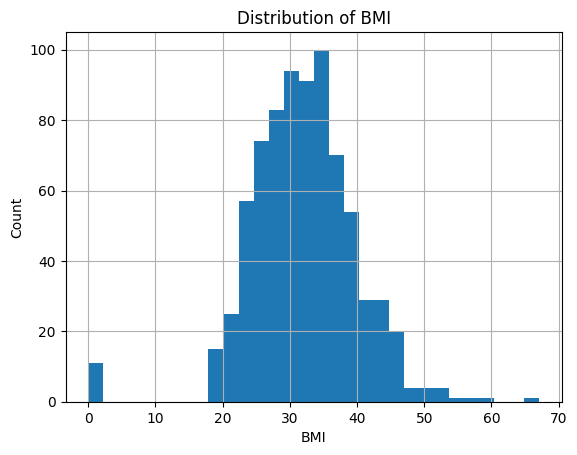

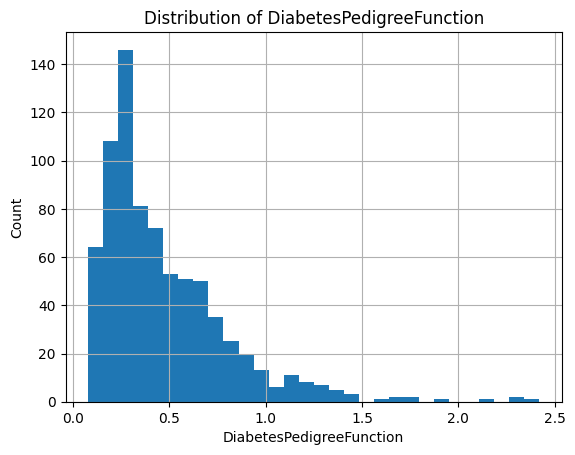

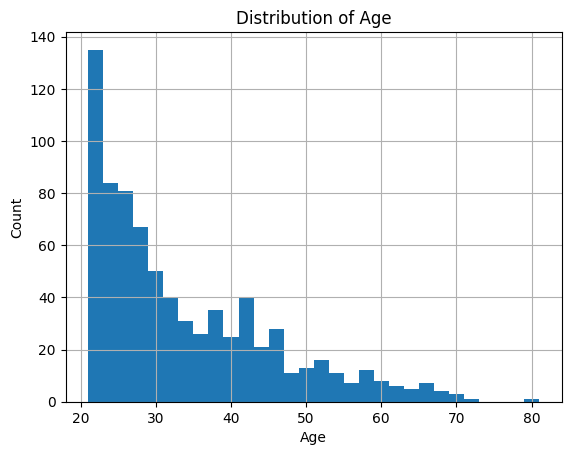

In [4]:
numeric_cols = [c for c in df.columns if c != "Outcome"]
for col in numeric_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## 5) Train / Test split and model pipeline

In [5]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Pipeline: scale features then logistic regression
pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_prob = pipe.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}\n")

print("Classification report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.714

Classification report:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



## 6) Confusion Matrix

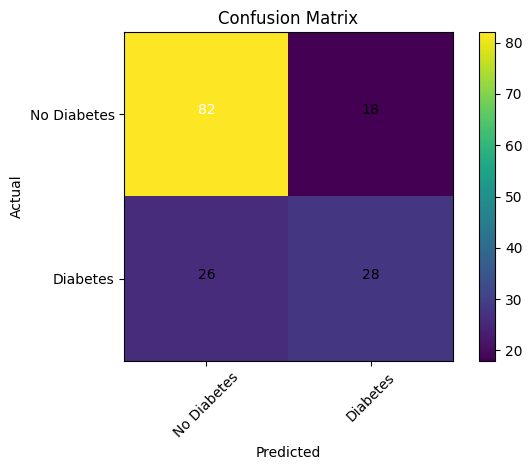

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
classes = ["No Diabetes", "Diabetes"]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

## 7) ROC Curve & AUC

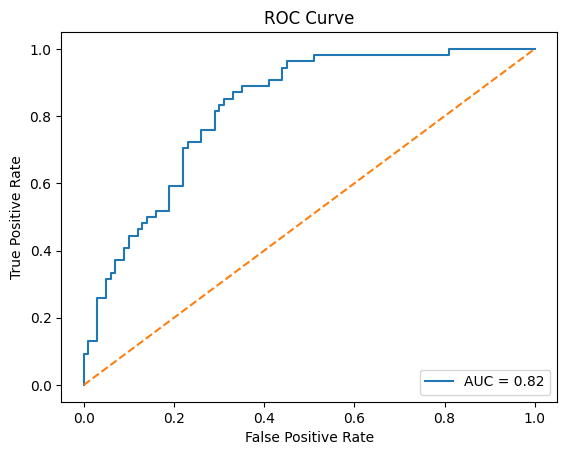

In [7]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

## 8) Feature Importance (Coefficients)

In [8]:
# extract coefficients from the trained logistic regression
logreg = pipe.named_steps["logreg"]
scaler = pipe.named_steps["scaler"]

# coefficients correspond to scaled features in the same order as X columns
coef = logreg.coef_.ravel()
importance = pd.Series(coef, index=X.columns).sort_values(key=abs, ascending=False)
importance_df = importance.reset_index()
importance_df.columns = ["feature", "coefficient"]
importance_df

,feature,coefficient
0,Glucose,1.144151
1,BMI,0.713893
2,Pregnancies,0.373178
3,DiabetesPedigreeFunction,0.255527
4,BloodPressure,-0.197637
5,Age,0.184179
6,Insulin,-0.127308
7,SkinThickness,0.066535


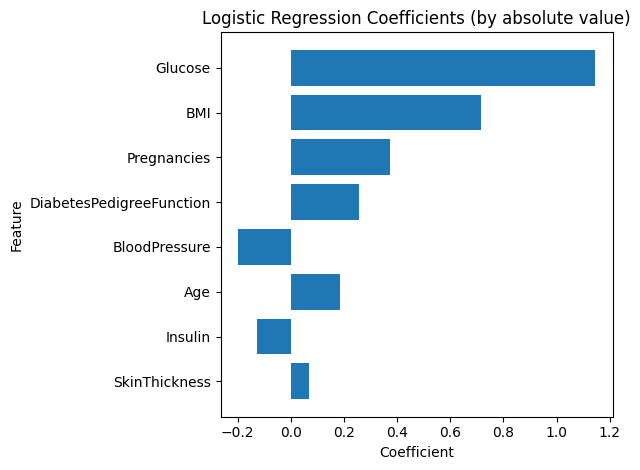

In [9]:
plt.figure()
plt.barh(importance.index, importance.values)
plt.title("Logistic Regression Coefficients (by absolute value)")
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()